In [2]:
# Cell 1: Import libraries and load the processed dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Define paths (use current notebook's directory to calculate the path)
notebook_dir = os.getcwd()  # Gets the current working directory (python/)
project_dir = os.path.dirname(notebook_dir)  # Goes up one level to project root
data_path = os.path.join(project_dir, 'data', 'processed', 'processed_data.csv')

# Load the processed dataset
df = pd.read_csv(data_path)

# Display basic information
print("Dataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

In [ ]:
# Summary statistics for numerical columns
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
           Order_Id  Origin_Latitude  Origin_Longitude  Shipping_Days  \
count  46946.000000     46946.000000      46946.000000   46946.000000   
mean   34231.611383        29.740479        -84.811178       3.501278   
std    21448.157841         9.801007         21.249896       1.621143   
min       12.000000       -33.937553       -158.025986       0.000000   
25%    21593.000000        18.265772        -97.991127       2.000000   
50%    28242.500000        33.128519        -76.980972       3.000000   
75%    52911.250000        39.270561        -66.370583       5.000000   
max    77204.000000        48.770958        115.049789       6.000000   

               Cost      Quantity  Destination_Latitude  \
count  46946.000000  46946.000000          46946.000000   
mean     179.953454      2.096749              5.319476   
std      114.125908      1.448374             23.625936   
min        7.490000      1.000000            -53.166700   
25%      100.000000      1.

In [ ]:
# Cell 3: Bar chart of average carbon emissions by shipping mode
plt.figure(figsize=(10, 6))
sns.barplot(x='Shipping_Mode', y='Carbon_Emissions_kg', data=df, estimator='mean')
plt.title('Average Carbon Emissions by Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Carbon Emissions (kg CO2e)')
plt.xticks(rotation=45)
plt.show()

NameError: name 'plt' is not defined

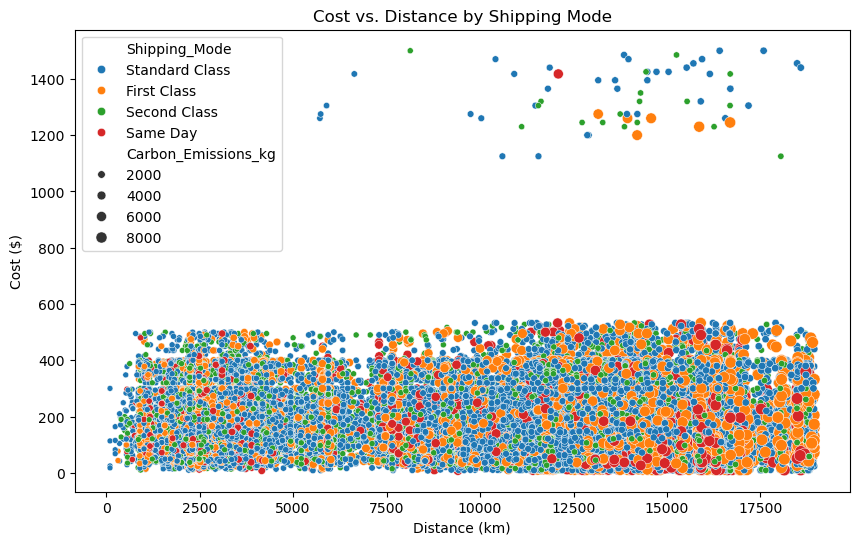

In [ ]:
# Scatter plot of cost vs. distance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Distance_km', y='Cost', hue='Shipping_Mode', size='Carbon_Emissions_kg', data=df)
plt.title('Cost vs. Distance by Shipping Mode')
plt.xlabel('Distance (km)')
plt.ylabel('Cost ($)')
plt.show()

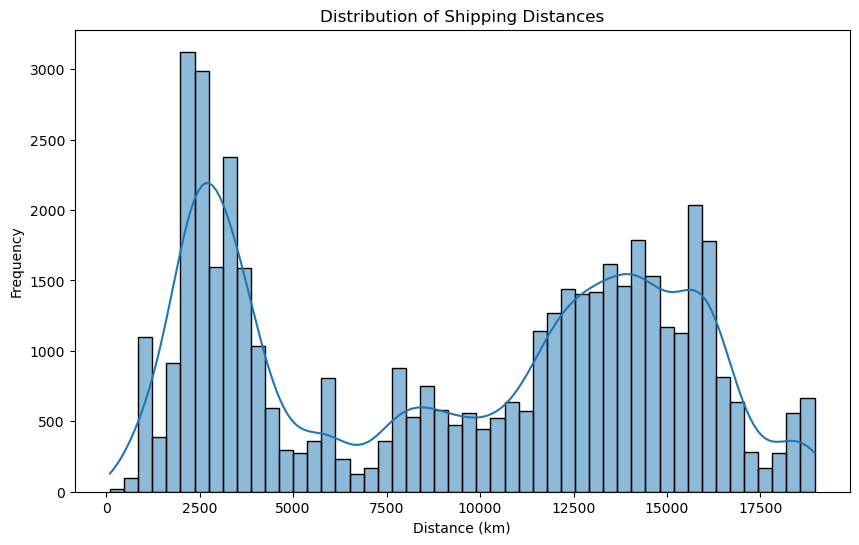

In [ ]:
# Histogram of distances
plt.figure(figsize=(10, 6))
sns.histplot(df['Distance_km'], bins=50, kde=True)
plt.title('Distribution of Shipping Distances')
plt.xlabel('Distance (km)')
plt.ylabel('Frequency')
plt.show()

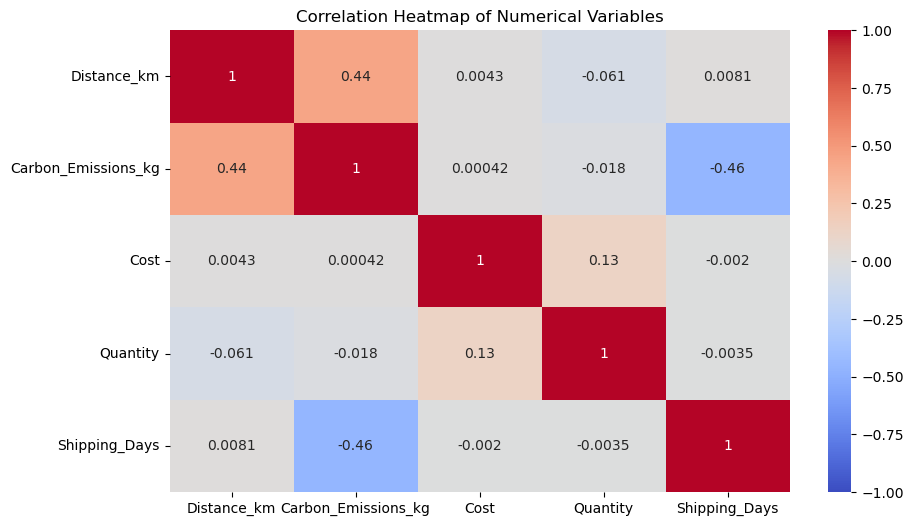

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
correlation_matrix = df[['Distance_km', 'Carbon_Emissions_kg', 'Cost', 'Quantity', 'Shipping_Days']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()